In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df= pd.read_csv("CSV/siniestos.csv")
df.head(3)

,Id,Fecha_x,Aaaa_x,Mm_x,Dd_x,Hora,N_victimas,Participantes,Rol,Acusado,...,Fecha_fallecimiento,Lugar_del_hecho,Tipo_de_calle,Calle,Cruce,Dirección normalizada,Comuna,Xy (caba),Pos x,Pos y
0,2016-0001,2016-01-01,2016,1,1,04:00:00,1,MOTO-AUTO,CONDUCTOR,AUTO,...,2016-01-01,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022
1,2016-0002,2016-01-02,2016,1,2,01:15:00,1,AUTO-PASAJEROS,CONDUCTOR,PASAJEROS,...,2016-01-02,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709
2,2016-0003,2016-01-03,2016,1,3,07:00:00,1,MOTO-AUTO,CONDUCTOR,AUTO,...,2016-01-03,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     717 non-null    object
 1   Fecha_x                717 non-null    object
 2   Aaaa_x                 717 non-null    int64 
 3   Mm_x                   717 non-null    int64 
 4   Dd_x                   717 non-null    int64 
 5   Hora                   717 non-null    object
 6   N_victimas             717 non-null    int64 
 7   Participantes          717 non-null    object
 8   Rol                    717 non-null    object
 9   Acusado                717 non-null    object
 10  Victima_x              717 non-null    object
 11  Sexo                   717 non-null    object
 12  Edad                   717 non-null    int64 
 13  Rango_etario           717 non-null    object
 14  Fecha_fallecimiento    648 non-null    object
 15  Lugar_del_hecho        

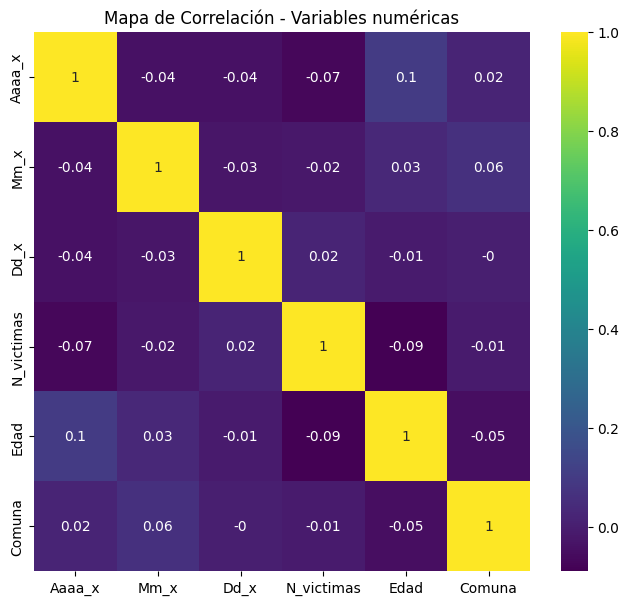

In [24]:
# Generamos un mapa de calor con las correlaciones de los todos los datos que contengan números 
dataNumerica = df.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(8,7))
sns.heatmap(corr, cmap="viridis", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

NO HAY BUENAS CORRELACIONES

In [25]:
#Informacion de numero de victimas
df["N_victimas"].describe()

count    717.000000
mean       1.061367
std        0.257024
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: N_victimas, dtype: float64

C:\Users\nahue\AppData\Local\Temp\ipykernel_13408\4253437496.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_filtrado, x="N_victimas", palette="Paired")


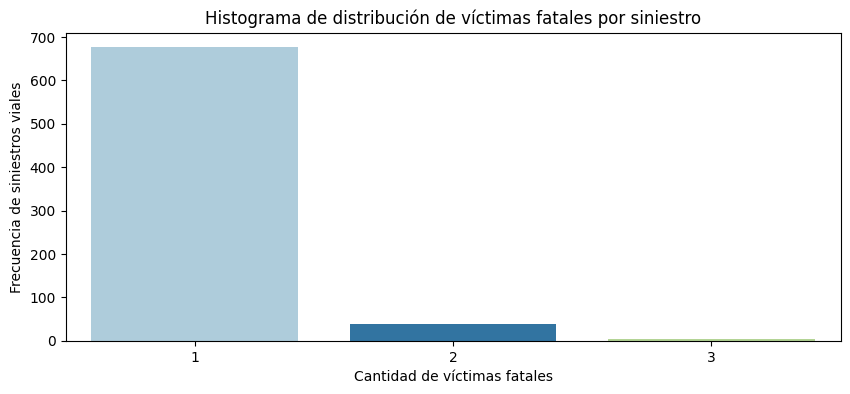

In [26]:
plt.figure(figsize=(10, 4))
# se filtran los valores sin datos o nulos 
df_filtrado = df[df["N_victimas"] != 0]

#Se cuentan los datos de la columna y se calcula la frecuencia en que se distribuye
sns.countplot(df_filtrado, x="N_victimas", palette="Paired")

plt.ylabel("Frecuencia de siniestros viales")
plt.xlabel("Cantidad de víctimas fatales")
plt.title("Histograma de distribución de víctimas fatales por siniestro")

plt.show()

In [29]:
# Agrupar por año y mes, y sumar el número de víctimas
rel_tiempo = df.groupby(['Aaaa_x', 'Mm_x'])['N_victimas'].sum().reset_index()
rel_tiempo

,Aaaa_x,Mm_x,N_victimas
0,2016,1,8
1,2016,2,12
2,2016,3,15
3,2016,4,11
4,2016,5,7
...,...,...,...
67,2021,8,9
68,2021,9,4
69,2021,10,5
70,2021,11,8


In [30]:
# Combinar AÑO y MES para obtener una sola variable de tiempo, creando la columna "Fecha" como str
rel_tiempo["Fecha"] = rel_tiempo['Aaaa_x'].astype(str) + '-' + rel_tiempo['Mm_x'].astype(str)

# Convertir la variable de tiempo a formato datetime
rel_tiempo["Fecha"] = pd.to_datetime(rel_tiempo["Fecha"])

# Ordenar el DataFrame por fecha para que tenga orden cronológico
rel_tiempo = rel_tiempo.sort_values("Fecha")

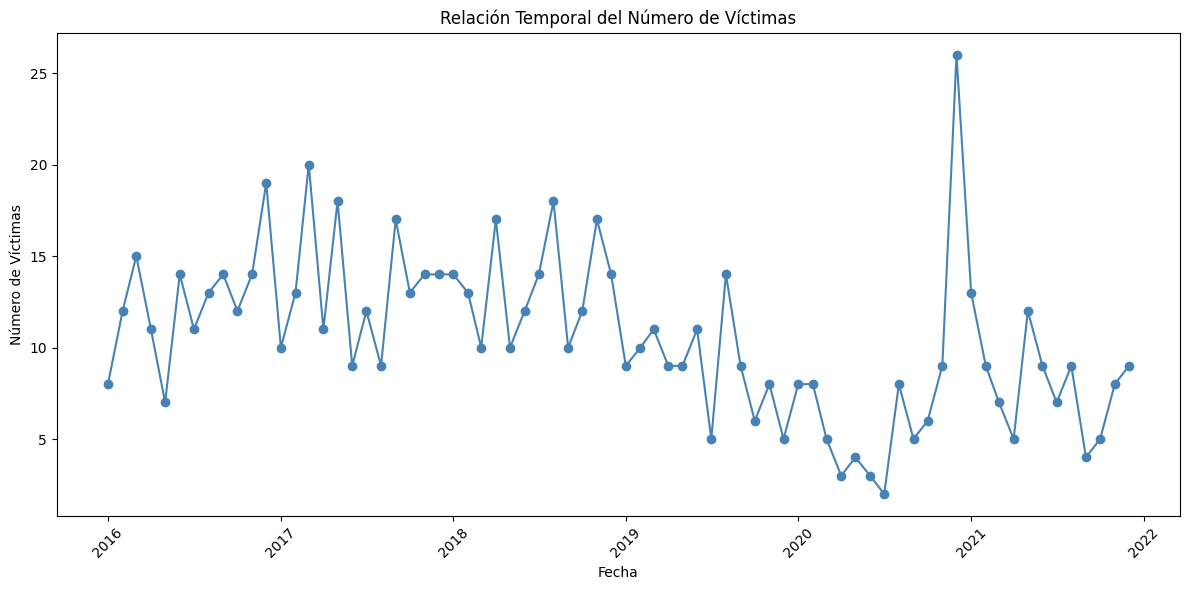

In [32]:
# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(rel_tiempo["Fecha"], rel_tiempo["N_victimas"], marker='o', color='steelblue')

# Añadir títulos y etiquetas
plt.title('Relación Temporal del Número de Víctimas')
plt.xlabel('Fecha')
plt.ylabel('Número de Víctimas')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El numero de victimas se disparo en 2021.

En el año 2020 no habia tanto transito por la Pandemia.

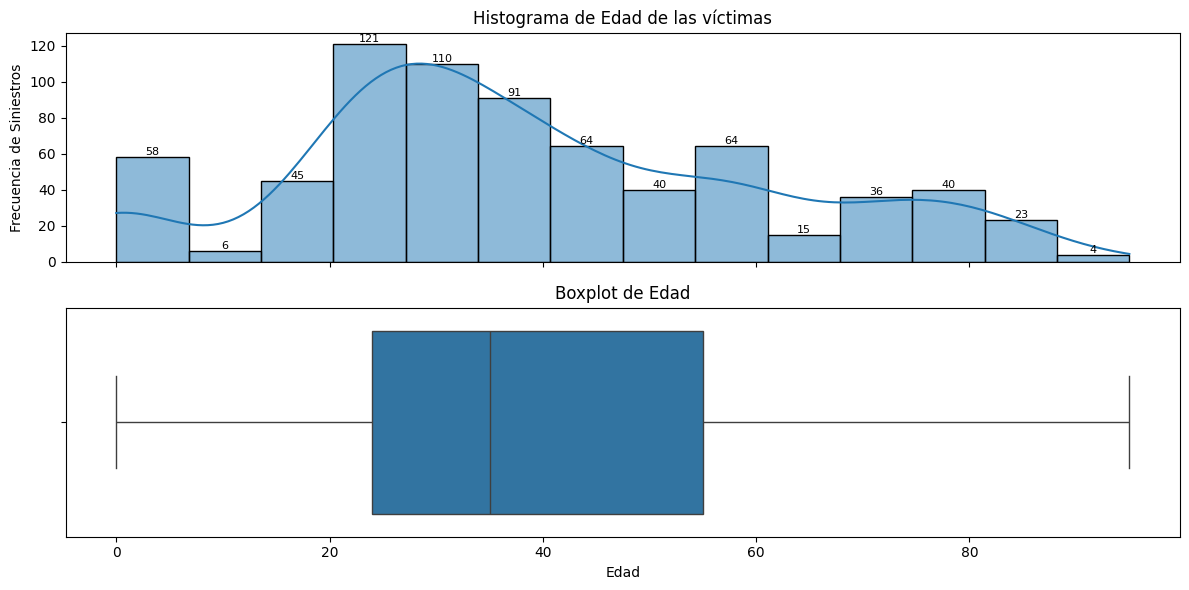

In [33]:
# Se crea una figura con un solo eje x compartido para tener dos gráficos en uno
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Se grafica el histograma de la edad
sns.histplot(df['Edad'], kde=True, ax=ax[0]) #se agrega la línea de suavizado
ax[0].set_title('Histograma de Edad de las víctimas') ; ax[0].set_ylabel('Frecuencia de Siniestros')

# Agregar etiquetas de datos en el histograma
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black')

# Se grafica el boxplot de la edad
sns.boxplot(x=df['Edad'], ax=ax[1])
ax[1].set_title('Boxplot de Edad') ; ax[1].set_xlabel('Edad')

# Se ajusta y muestra el gráfico
plt.tight_layout()
plt.show()

In [34]:
df["Edad"].describe()

count    717.000000
mean      39.050209
std       22.010669
min        0.000000
25%       24.000000
50%       35.000000
75%       55.000000
max       95.000000
Name: Edad, dtype: float64

En una visualización en general se puede observar que el 75% de las víctimas fatales es menor que 55 años, la mediana es de 39 años.

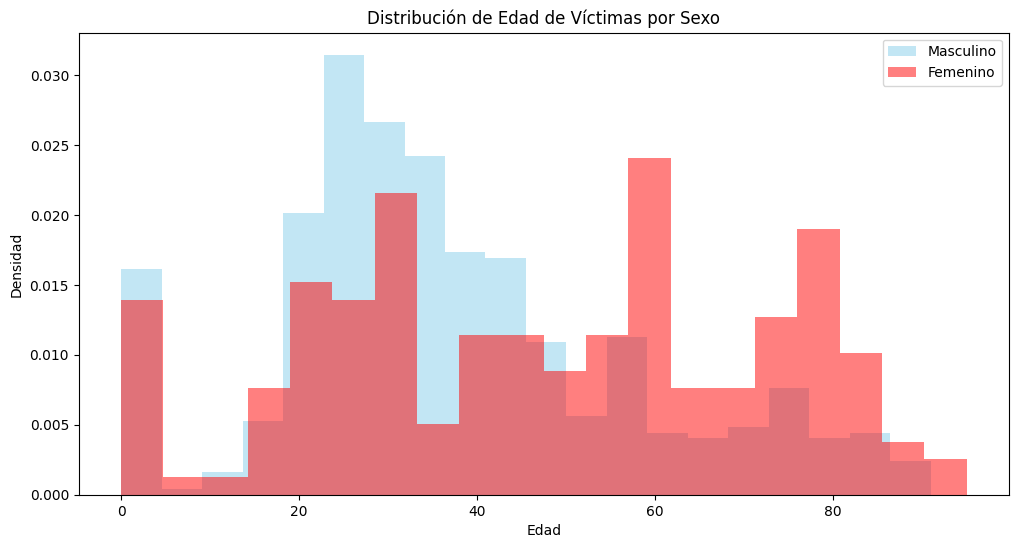

In [35]:
# Filtrar por sexo masculino
masculino = df[df['Sexo'] == 'MASCULINO']['Edad'].dropna()

# Filtrar por sexo femenino
femenino = df[df['Sexo'] == 'FEMENINO']['Edad'].dropna()

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.hist(masculino, bins=20, alpha=0.5, color='skyblue', label='Masculino', density=True)
plt.hist(femenino, bins=20, alpha=0.5, color='red', label='Femenino', density=True)
plt.title('Distribución de Edad de Víctimas por Sexo')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Distribución de los Tipos de Calles donde suceden los siniestros

C:\Users\nahue\AppData\Local\Temp\ipykernel_13408\3762125062.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df, x='Tipo_de_calle', palette="winter")


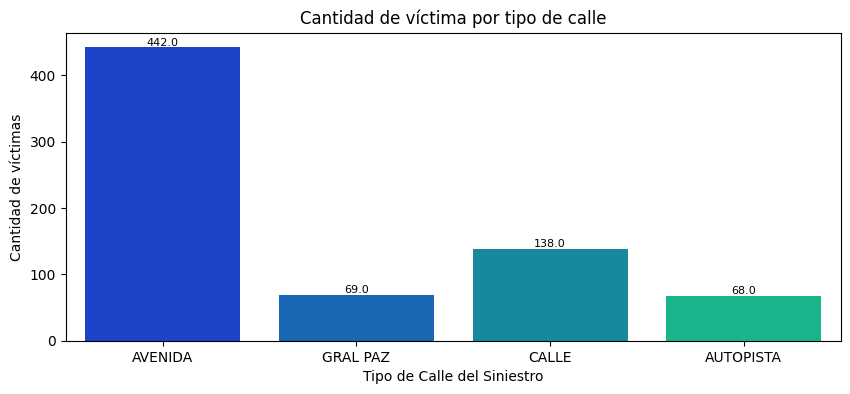

In [37]:
#Se crea el gráfico de barras
plt.figure(figsize=(10, 4))

ax=sns.countplot(df, x='Tipo_de_calle', palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

#Se titulan los ejes
plt.xlabel('Tipo de Calle del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctima por tipo de calle')

plt.show()

# Distribución de Participantes en los siniestros

C:\Users\nahue\AppData\Local\Temp\ipykernel_13408\3601797418.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df, x="Participantes", palette="winter")


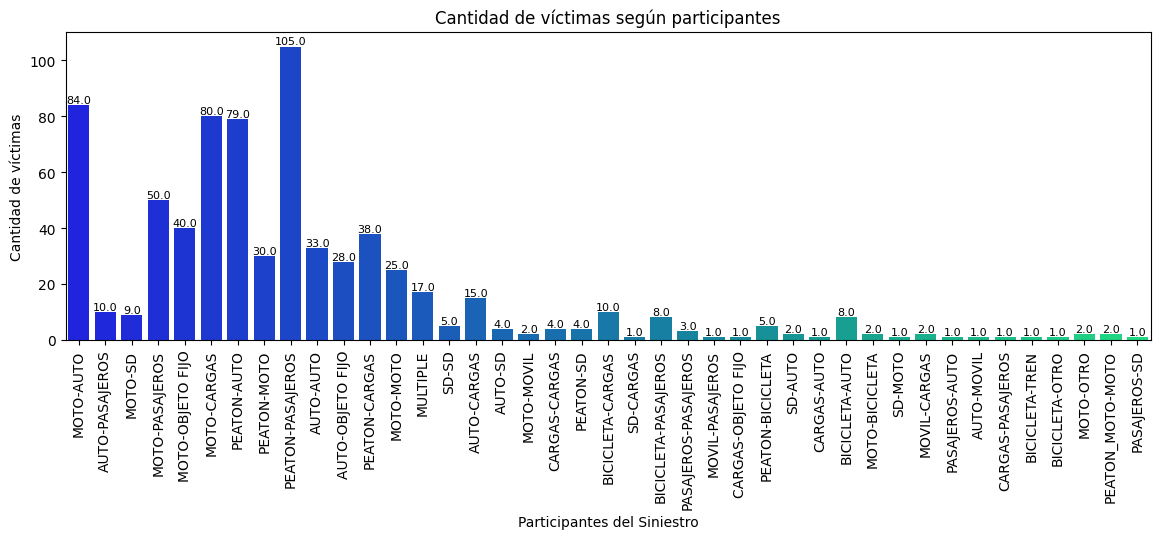

In [38]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="Participantes", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

#Se ubican los titulos de las barras en 90 grados
plt.xticks(rotation=90)

#Se titulan los ejes
plt.xlabel('Participantes del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según participantes')

plt.show()

Los participantes que mas generan siniestros son "Peaton-Pasajero" en Victimas

# Distribución de Acusados en los siniestros

C:\Users\nahue\AppData\Local\Temp\ipykernel_13408\2202415886.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df, x="Acusado", palette="winter")


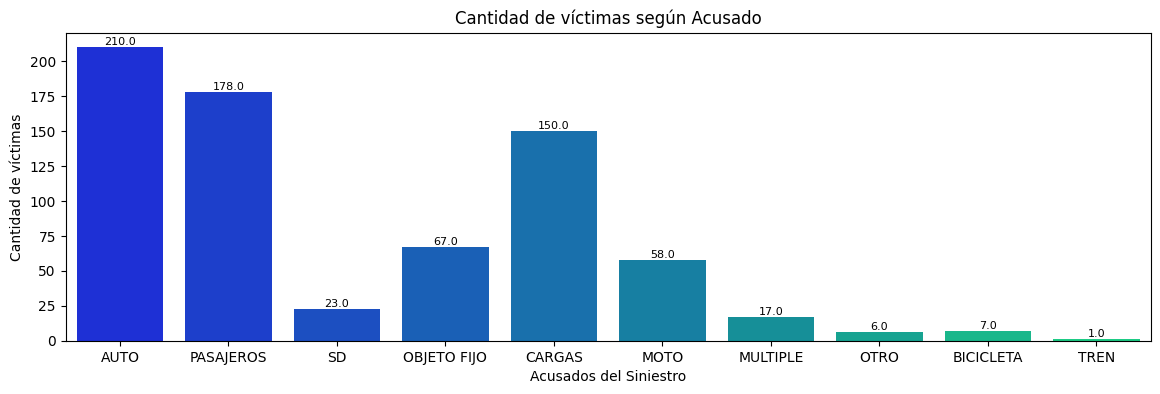

In [39]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="Acusado", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


#Se titulan los ejes
plt.xlabel('Acusados del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según Acusado')

plt.show()

Text(0.5, 1.0, 'Proporción de Víctimas por Sexo')

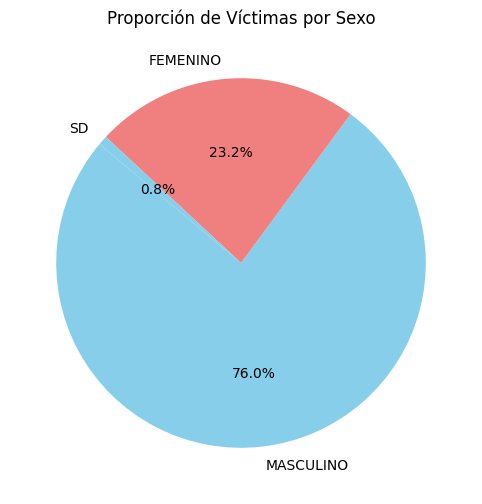

In [40]:
# Calcular la proporción de víctimas por sexo
proporcion = df['Sexo'].value_counts(normalize=True) * 100

# Preparar los datos para el gráfico de torta
labels = proporcion.index
sizes = proporcion.values

# Crear el gráfico de torta
plt.figure(figsize=(12, 6))

# Gráfico de torta

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Proporción de Víctimas por Sexo')